# Assignment 5
#### Due October 21, 2020, 23:59

In this week's assignment, we will investigate a dataset through different types of plots, and use these plots to describe the properties of the dataset.

We are going to investigate the famous iris dataset, a database of iris flowers. The dataset is given in the file `iris.data` which contains a collection of iris flowers, one flower per row, each described by four attributes and the class it belongs to:

1. sepal length in cm
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class:
    - 0 = Iris Setosa
    - 1 = Iris Versicolour
    - 2 = Iris Virginica

You can find more details on the dataset [here](https://archive.ics.uci.edu/ml/datasets/iris).

![data description](img/iris.jpg)

## Submission
All exercises this week, apart from exercise 1, amount to plotting a figure. The libraries you will need are already given, any extra imports are not allowed.

Implement your solution to each of the exercises in the code field below the exercise description.

- Edit and turn in this jupyter notebook file containing your solutions to each task -- keep the name `assignment5.ipynb`.
- Make sure that we are able to run the notebook by placing our own copy of `iris.data` inside the same folder as this notebook.

## Assignment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Exercise 1
Let's start out by inspecting our data. Load the data from the file, `iris.data`, into a numpy array. 

Extract the features (sepal length, sepal width, petal length, and petal width) into a variable, `X`, and the class into a variable, `y`. Make sure to look at what kind of values are contained in `y`.

**NB!** `iris.data` is formatted as a whitespace-delimited data file and can be loaded using `np.loadtxt()` with default parameters.
___

Shape of `X`: `(150,4)` 
Shape of `y`: `(150,)`

In [2]:
# your solution to exercise 1 here
path = r'C:/Users/tjupp/Desktop/ITU/Intro_programing/Assignment5/iris.data'
#Using the load function automaticly converts the data to a np.array
data = np.loadtxt(path)
#Here I extract the features into the x dataset
x = data[:,0:4]
#Here I extract the class into the y dataset
y = data[:,4]
#Here I simply print them
print('x-shape:',x.shape,'y-shape:',y.shape)

x-shape: (150, 4) y-shape: (150,)


## Exercise 2
When dealing with datasets we are often interested in the contained class distribution to observe if they are balanced or skewed. 

Plot a bar-plot that displays the frequency of each class of flower (0=Iris Setosa, 1=Iris Versicolor, and 2=Iris Virginica) to see if the classes are balanced. 

The plot **must** have named labels for the x and y axis, and a title. The labels on the x-axis should be the actual name of the class, not the integer representation.

In [3]:
#Here i count how many of each class is within the dataset
unique, counts = np.unique(y, return_counts=True)
dictionary = dict(zip(unique, counts))
#Here I use a loop to generate a list which I will use for my bar-graph
li = []
for elm in dictionary:
    li.append(dictionary[elm])
#Here I generate the tags for the bar-graph
tags = ['Iris_Setosa', 'Iris_Versicolor', 'Iris_Virginica']

<BarContainer object of 3 artists>

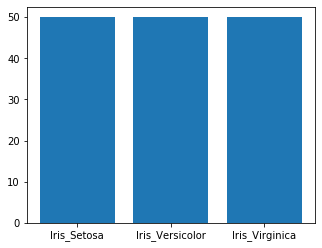

In [4]:
# your solution to exercise 2 here

#Here I generate the plot(?) not exactly sure what the first two lines does, but they are always represented 
#when you are plotting
fig = plt.figure(figsize = (4,3))
axes = fig.add_axes([0,0,1,1])
#Here i plot the bar-graph using the tags and the list of elements.
axes.bar(tags,li)

## Exercise 3
We'd like to investigate how the features of each flower distribute within each class. 

For each of the three classes of flower, plot a histogram for each feature (sepal length, sepal width, petal length, and petal width). Also, for each histogram, fit a normal distribution to the data, and plot it on top of the histogram. 

This should amount to 3x4 figures. 

The plots **must** have named labels for the x and y axis, and a title.
___

Example of a single unrelated histogram plot with its normal distribution plotted on top (missing axis labels and title):

<img src="img/hist.png" align="left" width="300">

In [5]:
#Here I generate the lists
Iris_Setosa = []
Iris_Versicolor = []
Iris_Virginica = []
#Here i generate a list of lists
total = [Iris_Setosa,Iris_Versicolor,Iris_Virginica]
#Here i generate the tags used for later
features = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
#Here I use a nested loop to generate the different propeties of the flowers
mu_list = []
sigma_list = []
count = 0

for elm in total:
    for i in range(0,4):
        elm.append(x[count:count+50,i])
        mu, sigma = stats.norm.fit(x[count:count+50,i])
        mu_list.append(mu),sigma_list.append(sigma)

    count = count + 50
#Here i generate  a list of lists which i will use for the plots
sigma_list = np.array(sigma_list)
sigma_list = np.array_split(sigma_list,3)
mu_list = np.array(mu_list)
mu_list = np.array_split(mu_list,3)

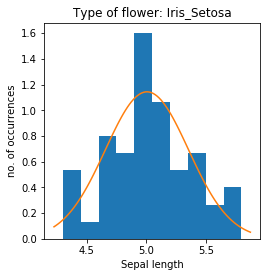

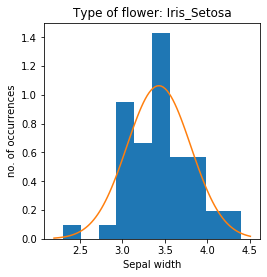

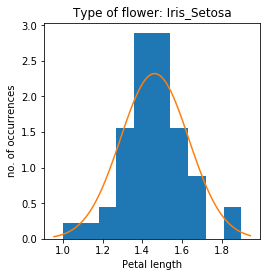

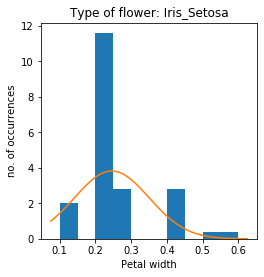

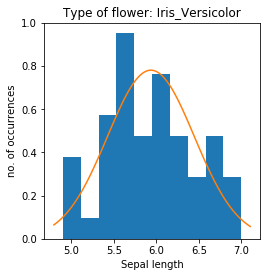

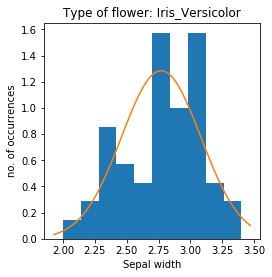

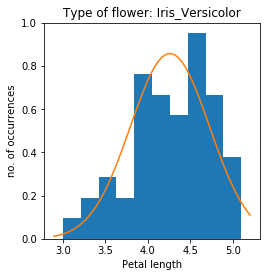

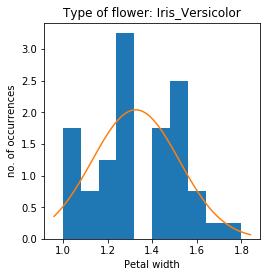

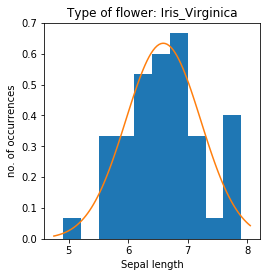

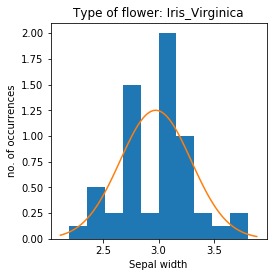

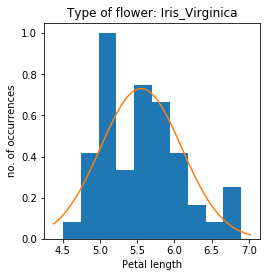

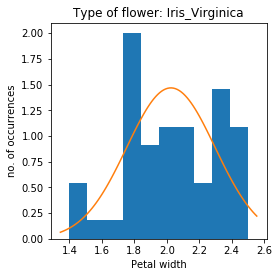

In [6]:
#Here i plot the bar-graph using the tags and the list of elements.
count = 0
for elm in total:
    for i in range(0,4):
        fig = plt.figure(figsize = (3,3))
        ax = fig.add_axes([0,0,1,1])
        #Here i generate the histogram
        ax.hist(elm[i],bins = 10,density = True)
        #Here i generate the labels
        ax.set_title('Type of flower: ' + tags[count])
        ax.set_xlabel(features[i])
        ax.set_ylabel('no. of occurrences')
        #Here i find the normal distribution
        xmin, xmax = ax.get_xlim()
        l = np.linspace(xmin, xmax, 100)
        p = stats.norm.pdf(l, mu_list[count][i],sigma_list[count][i])
        ax.plot(l,p);
    count = count +1 


## Exercise 4
Now that we know how the features are distributed across classes and features we'd like to visually inspect how these features relate across classes. 

Extract the samples that belong to the two classes 0 and 1 (Iris Setosa and Iris Versicolor) and create a scatter-plot of the sepal values (feature 1 and 2) for the two classes in **one** plot. Then fit a regression line to each of the classes and plot the line on top of the scatter plot. Give the two classes different colors so that you can easily distinguish the different samples. 

The plot **must** have named labels for the x-axis, y-axis, a title, and a legend.

Hint: To produce the regression line use `stats.linregress`
___

Example with three classes plotted for the features 1 and 3 -- yours should only have the two classes, Setosa and Versicolor, and they should be plotted for the features 1 and 2.

<img src="img/scatter.png" align="left" width="350">

In [9]:
#Here i generate the data
Iris_Setosa_data = total[0][0:2]
Iris_Versicolor_data = total[1][0:2]

#Here i use linear regression to find the slope and interception
slope1, intercept1, _, _,_ = stats.linregress(Iris_Setosa_data)
slope2, intercept2, _, _,_ = stats.linregress(Iris_Versicolor_data)

[]

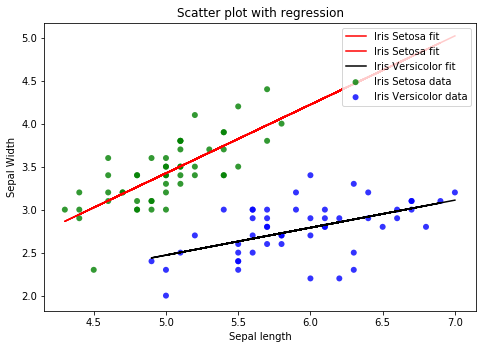

In [18]:
#disclaimer:
#For some reason I had to use a loop for Setosa, because it would only fit half the data which is the reason
#the label is plottet twise.

#Here i generate the plots and some labels
groups = ("Iris Setosa data", "Iris Versicolor data")
colors = ("green", "blue")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
data = (Iris_Setosa_data, Iris_Versicolor_data)

#Here i use a loop to create the scatterplots
for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', label=group)
    plt.plot(x, intercept1 + slope1*x, 'r',label = 'Iris Setosa fit')

#Here i add all the labels
plt.plot(x, intercept2 + slope2*x, 'black', label = 'Iris Versicolor fit')
plt.title('Scatter plot with regression')
plt.xlabel('Sepal length')
plt.ylabel('Sepal Width')
plt.legend(loc=1)
ax.plot()
